In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/train.csv')

In [3]:
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [4]:
df.shape

(19579, 3)

In [5]:
df['author'].value_counts()

,count
author,
EAP,7900
MWS,6044
HPL,5635


In [6]:
import nltk

In [7]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [10]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [13]:
def clean_text(text):
  text = text.lower()
  text = ''.join([c for c in text if c not in string.punctuation])
  words = text.split()
  words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
  return ' '.join(words)

In [14]:
df['clean_text'] = df['text'].apply(clean_text)


In [15]:
df['clean_text'].head()

,clean_text
0,process however afforded mean ascertaining dim...
1,never occurred fumbling might mere mistake
2,left hand gold snuff box capered hill cutting ...
3,lovely spring looked windsor terrace sixteen f...
4,finding nothing else even gold superintendent ...


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['clean_text'])

In [17]:
y = df['author']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [21]:
y_pred = nb_model.predict(X_test)


In [22]:
from sklearn.metrics import accuracy_score, classification_report

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8240551583248212
Classification Report:
               precision    recall  f1-score   support

         EAP       0.84      0.79      0.82      1570
         HPL       0.83      0.82      0.82      1071
         MWS       0.80      0.87      0.83      1275

    accuracy                           0.82      3916
   macro avg       0.82      0.83      0.82      3916
weighted avg       0.83      0.82      0.82      3916



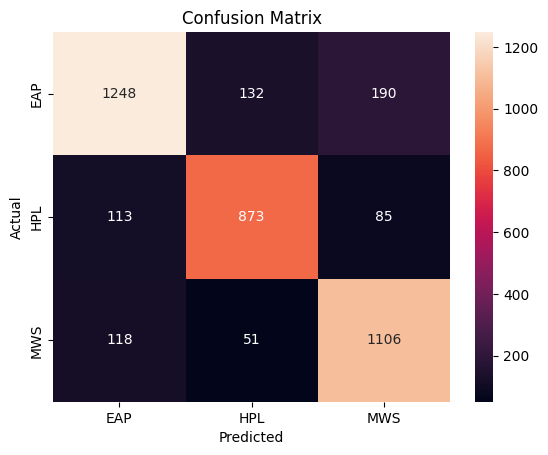

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=nb_model.classes_)

# Plot heatmap
sns.heatmap(cm, annot=True, fmt='d', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use unigrams and bigrams (1-gram and 2-grams)
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_df=0.95, min_df=5)

# Transform the cleaned text
X_tfidf = tfidf.fit_transform(df['clean_text'])


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)


In [26]:
nb_model_tfidf = MultinomialNB()
nb_model_tfidf.fit(X_train, y_train)


MultinomialNB()

In [27]:
y_pred = nb_model_tfidf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print("TF-IDF Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


TF-IDF Model Accuracy: 0.8130745658835546
Classification Report:
               precision    recall  f1-score   support

         EAP       0.78      0.85      0.81      1570
         HPL       0.85      0.75      0.80      1071
         MWS       0.83      0.82      0.82      1275

    accuracy                           0.81      3916
   macro avg       0.82      0.81      0.81      3916
weighted avg       0.82      0.81      0.81      3916

